# IMU based Gesture Recognition

In this notebook the system's capabilities are evaluated. 

First, ten training gestures got recorded. Next, a Machine Learning Classifier is trained on the data. Finally the its predictions are tested in two experiments:
1. __(A1)-Test__: Train-Validation-set-split of a __single dataset__ from an __experienced user__ 
2. Train-Test-set-split of two independant datasets. One is used for training and one for testing:
    - __(A1-A2)-Test__: Algorithm is applied to datasets from an __experienced user__ --> _very high prediction accuracy_
    - __(A1-A3)-Test__: Algorithm is applied to datasets from an __experienced user__ --> _medium prediction accuracy_
    - __(B1-B2)-Test__: Algorithm is applied to datasets from an __inexperienced user__ --> _low prediction accuracy_
    - __(A1-B2)-Test__: Algorithm is applied to datasets from two __experienced, different users__ --> _very low prediction accuracy_
    
The (A1)-Test is used to optimize the classifier and its features. With this experiment the working baseline is developed. The (A1-A2),(B1-B2),(A-B)-Tests focus on the real scenario, in which one complete dataset is available for training, and on the human impacts. More details are shown in the concerning sections.

---

### Important to mention: 
- This Notebook only focusses on the __highlevel experiments__. The concerning functions can be found in the folder /functions.
- This Notebook differs from the Prototype in the following fundamental way: The hardware prototype learns from an entire dataset and applies its knowledge to single gesture-vectors. Here the system also learns from an entire dataset (matrix), but applies it to another entire dataset (matrix). This is necessary for insightful experiments.
- The functions that are used here are also used in the hardware prototype. Therefore the results are comparable

---

### Gestures:
This table shows the gestures and how they are executed. The gesture names are the same, that are displayed in the confusion matrix


<img src="img/gestureTable.png">

----

### datasets
The following datasets can be used for evaluation (see folder /data):
```
# Available datasets:
# User A: 'User_A1_011017', 'User_A2_011017', 'User_A3_121017' 
# User B: 'User_B1_131017', 'User_B2_131017'
# User C: 'User_C1_071017' 
```
These datasets (folder string-descriptions) can be directly used for the experiments, listed below. 3 different users have recorded these datasets (User A,B,C). Furthermore, the recording date is included. The datasets reflect the real-life dataquality that can be expected. Some of them contain biases, as they occur in the recording process.
Generally speaking: 
- __User A: very experienced user__ - has trained the system at least 5 times. All datasets show consistent data quality
- __User B: inexperienced user__ - has trained the system only two times (both datasets are included here)
- __User C: inexperienced user__ - has trained the system only a single time.



---

In [2]:
# imports
from GesBerry_eval import conf_matrix, clf_acc, cross_val, x_y_test, x_test

from sklearn.model_selection import train_test_split # ---- vers. scikit-learn: 0.19.1
from sklearn.ensemble import RandomForestClassifier

In [13]:
# globals
frame_size = 140 # ---------------------------------------- 1.4 seconds recording window

---

# (A1) - Test

Only one dataset is used for training and validation. This was used originally to garantue the classifiers functionality. Now it can also be used to verify the data quality consistency within one dataset (An example for an inconsistent dataset: try ```'User_B1_131017'``` as the argument). 

The experiment follows the following procedure:
1. Get labeled dataset and split it into training and validation set (Split ratio: training: 70%, validation 30%)
2. preprocess and learn from train data; afterwards put a decision boundary function out. The decision boundary function contains the knowledge of the classifier on how to relate the data to the gestures
3. preprocess and classify the data. The preprocessing is the same as it is applied in the learning step. The labels are excluded and the classifier identifies the labels of the gestures
4. Evaluate the classification results in 3 experiments:
    - Confusion matrix
    - Accuracy score
    - k-fold crossvalidation score

<br/>

<img src="img/flowchart_A1Test_(1).png" width="420">

<br/>

For further information please check the x_test-function in the script GesBerry_eval.py

RandomForestClassifier ---> Crossval score Accuracy:  0.96 (+/- 0.14)
Accuracy of the current Train_test-split --------- :  0.8461538461538461


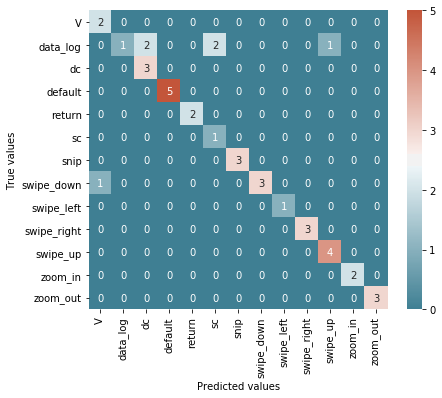

In [4]:
x_test('User_A1_011017') # A1-Test function call

The crossval score is the major evaluation criteria. It shows the overall accuracy. The confusion matrix can be used to find gestures, that are difficult to detect. Nevertheless this is not an unambigious criteria. The crossval score is more precise.

-----

# (A1-A2)-Test

In this experiment an experienced users records two datasets on the same day. One is used for training and one is used for testing. The resulting prediction accuracy is very high.

The following flowchart displays the process:
1. Get labeled dataset A1
2. preprocess raw dataset into features
3. learn from dataset A1
4. Get labeled dattaset A2
5. preprocess raw dataset into features
6. import decision-boundary-function (the knowledge) and predict concerning gestures of dataset A2
7. Compare the predicted gestures with the real gestures:
    - print an accuracy score
    - plot a confusion matrix

The procedure can be seen in the following flowchart:

<br/>

<img src="img/flowchart_X1_X2_test.png" width="450">

<br/>

Accuracy of the current Train_test-split --------- :  0.9846153846153847


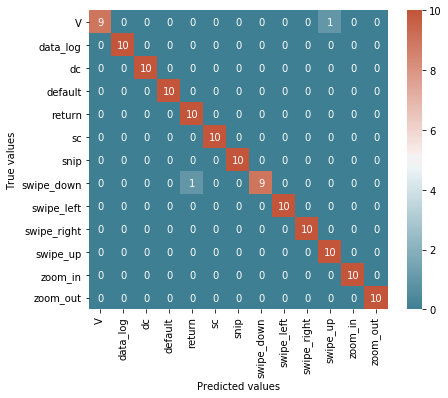

In [5]:
x_y_test('User_A1_011017', 'User_A2_011017') # User_A1, User_A2

# (A1-A3)-Test

This experiment shows a user who forgets gesture executions: The "experienced"
user records two datasets within 11 days. Now the system is trained with the older
samples and applied to the newer dataset. The detection accuracy drops below 90%

Accuracy of the current Train_test-split --------- :  0.8461538461538461


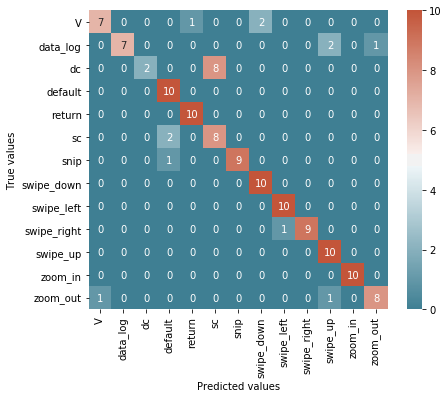

In [9]:
x_y_test('User_A1_011017', 'User_A3_121017') # User_A1, User_A3

# (B1-B2)-Test

**TODO** Umschreiben: Muss nicht (B1-B2) sein, sondern viel besser, wenn das ein (B1-B2) Vergleich ist

This experiment shows the human-learning process and how it affects the data quality. Here an inexperienced user records two datasets. One is used for training (the first recording ever) and the second is used for training. This experiment shows the differences in data quality:

Accuracy of the current Train_test-split --------- :  0.8307692307692308


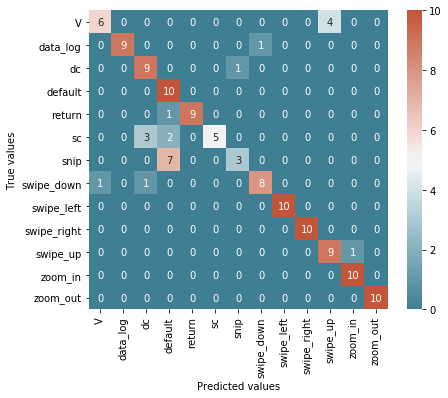

In [6]:
x_y_test('User_B1_131017', 'User_B2_131017') # User_B1, User_B2

In the beginning the inexperienced operator performs the gestures slowly and with a wide
range of arm motion. The more often a user trains the Gesture Control Interface, the smaller the variations in the
gesture executions get.

For example: An inexperienced operator records the gesture “return” several times. “return”
includes writing the letter “X” with the hand in the air. Initially it is drawn slowly and with
wide arm movements. After the 4 th or 5 th repetition (first sampling session), the user has
adapted and writes the “X” faster, with only spinning the wrist and using minor arm
movements.

The problem is: The sensor output per gesture is not consistent in this data recording session.
Here the first 4 or 5 executions differ from the subsequent ones. A classifier that is trained on
such a dataset is trained with at least 4 or 5 gestures that do not reflect the “normal” gesture
executions. Thus it later performs biased predictions

Not only must the GCI learn from the data, but also the users themselves need to learn to
perform consistent gestures. Inconsistent gesture executions lead to inconsistent data. A
classifier that is trained with inconsistent data performs biased predictions.

__To sum it up:__ Not only needs the Gesture Control Interface adapt to the user’s data, but also the user adapts his
gesture executions in a learning process. It takes 2 gesture-sampling sessions until the
movement patterns stagnate and the data is suitable for the Gesture Control Interface. Inexperienced users cannot
directly use the Gesture Control Interface. The proper gesture executions need to be learned first.

----

# (A1-B2)-Test

Here the classifier is trained with the data of user (A) and then applied to the gestures of user
(B). Both users are experienced. The experiment procedure is the same as in the (A1-A2)-Test
The objective of this experiment is to find out, how robust
the classifier is in performing user-independent gesture analysis.

Accuracy of the current Train_test-split --------- :  0.5


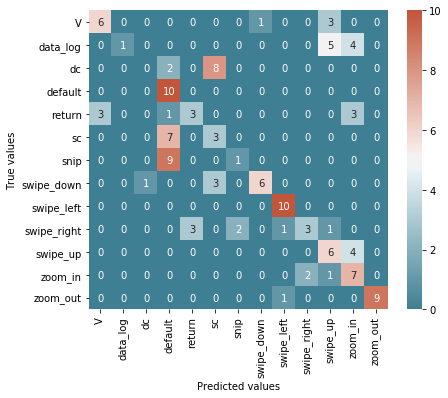

In [11]:
x_y_test('User_A1_011017', 'User_B2_131017')

The classifier is not capable to perform reliable gesture estimations.